# **PDAN8412 - Task 2 - Semester 2 - 2023**
# **ST10117137 - Kashik Ramnath**
*** 

## Database Reference: <br>
**Parent Webiste:** www.kaggle.com <br>
**URL:** https://www.kaggle.com/datasets/flenderson/sales-analysis/data <br>
**Database Author:** JamesS
***

## What is Logistic Regression:
Logistic regression is a supervised machine learning algorithm mainly used for classification tasks where the goal is to predict the probability of an instance belonging to a given class. It is used for classification algorithms. Logistic regression is referred to as regression because it takes the output of the linear regression function as input and uses a sigmoid function to estimate the probability for the given class. Logistic regression predicts the probability that an instance belongs to a given class or not, (Geeks for Geeks, 2023).

Logistic regression predicts outputs of categorical dependent variables if forms such as 0 or 1, True or False, Yes or No, etc. Logistic regression makes use of 'S' shaped logstic functions (indicates the likelihood of something) responsible for predicting 2 maximum values (0 or 1). Logistic Regression can be used to classify the observations using different types of data and can easily determine the most effective variables used for the classification.
***

## Why dataset is appropriate for Logistic Regeression:
The data consists of products both previously in inventory and currently in inventory with the purpose of predicting if a product will sell successfully, indicated by the target value of 0 or 1 (SoldFlag variable). If a product is predicted to not sell successfully it can be removed from inventory.

This is an example of a classification problem, as if a product has a high chance of selling, it can be clasified as 1, while 0 if vice versa. Logistic Regression Classification does this task perfectly as explained in the previous section. 
The dataset consists of primarily numerical data, with 2 columns of categorical-textual data with can be replaced with numerical alternatives for the reason of quanitifiability; this makes the dataset compatible and quantifiable using logistic regression. Therefore the dataset is approriate for Logistic Regression.
***

## What analysis will be performed on dataset:
- **Exploratory data analysis (EDA):**
This process will be used with the dataset to perform investigations on the dataset’s variables and relationships between them to discover patterns, anomalous values that need to be removed (cleaning data), testing hypotheses and checking assumptions with aid of graphical representations in the form of graphs and diagrams and summary of statistics (Visualization). This will be used for the purpose of data cleaning of null, duplicated, and outliers, the visualization of each variable for understanding and interpreting and preparing the data for being processed into creating the models.

- **Predictive Analysis:**
Predictive analytics is a branch of advanced analytics that makes predictions about future outcomes using historical data combined with statistical modeling, data mining techniques and machine learning. This task will use predictive analysis in the form of logistic regression to classify products by its probability of being sold or not.

- **Univariate analysis:**
This is a type of data analysis or sub-category used during EDA. Univariate analysis is the simplest type of analysis that analyses a single variable of the dataset at a time. The main purpose is to summarize, describe and find patterns in the dataset. Each variable can be individually analyzed for outliers, visualized, cleaned, and understood.

- **Purpose of the analysis:**
The question the analysis will answer is which products should be continued to sell, and which products to remove from the inventory. Data wranlging will include removing nulls and duplicates, transforming of textual-categorical data into numerical alternatives such as 1 and 0 using get_dummies, and standardizing data through StandardScalar(). To prevent overfitting and underfitting the data, the model will be trained with sufficient data, features and reduced noise. The Logistic Regression model from scratch will be evaluated and visuaslised using a confusion matrix and the metrics of accuracy, precision, recall, f1, and ROC as these are the approriate metrics for logistic regression. The reults will we compared to those of SKLearn's Logistic Regression classifier library. Other methods or alternatives to that of which is used in this task may include the Decision Tree model, Under/Over-sampling.
***

## References
- Kaggle. 2023. Historical Sales and Active Inventory, n.d. [Online]. Available at: https://www.kaggle.com/datasets/flenderson/sales-analysis/data [Accessed 23 October 2023].

- Geeks for Geeks. 2023. Logistic Regression in Machine Learning, n.d. [Online]. Available at: https://www.geeksforgeeks.org/understanding-logistic-regression/ [Accessed 23 October 2023].

- IBM. 2023. Mardown for Jupyter nbotebooks cheatsheet, 27 September 2021. [Online]. Available at: https://www.ibm.com/docs/en/db2-event-store/2.0.0?topic=notebooks-markdown-jupyter-cheatsheet [Accessed 29 October 2023].

- Medium. 2023. Logistic regression from scratch, 15 January 2021. [Online]. Available: https://medium.com/swlh/logistic-regression-from-scratch-b69a2026536f [Accessed 23 October 2023].
***



# Import Libraries & Dataset

In [1]:
# installs missingno for visualisation of missing values
%pip install missingno

# imports inportant libraries
import missingno

import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: missingno in d:\anaconda\lib\site-packages (0.5.2)



In [2]:
# Reads the database and prints it for
# potraying that it was successful
df = pd.read_csv('SalesKaggle3.csv')
df

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,6.827430e+05,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1.016014e+06,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,3.404640e+05,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,3.340110e+05,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1.287938e+06,121.95,2010,28,4.00,23.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198912,208023,Active,109683,NaN,NaN,D,7,1,2.101869e+05,72.87,2006,54,8.46,60.59
198913,208024,Active,416462,NaN,NaN,D,8,1,4.555041e+05,247.00,2009,65,8.40,74.85
198914,208025,Active,658242,NaN,NaN,S,2,1,1.692746e+05,50.00,2012,23,23.98,32.62
198915,208026,Active,2538340,NaN,NaN,S,2,1,3.775266e+05,46.95,2001,23,27.42,37.89


# Exploratory Data Analysis

In [3]:
# lets first examine if there are any 
# missing values, and how many are there
df.isnull().sum()

# as we can see there are alot of missing target variables and therefore
# we will need to identify them

Order                    0
File_Type                0
SKU_number               0
SoldFlag            122921
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64

In [4]:
# lets examine the size of the dataset
df.shape

(198917, 14)

<Axes: >

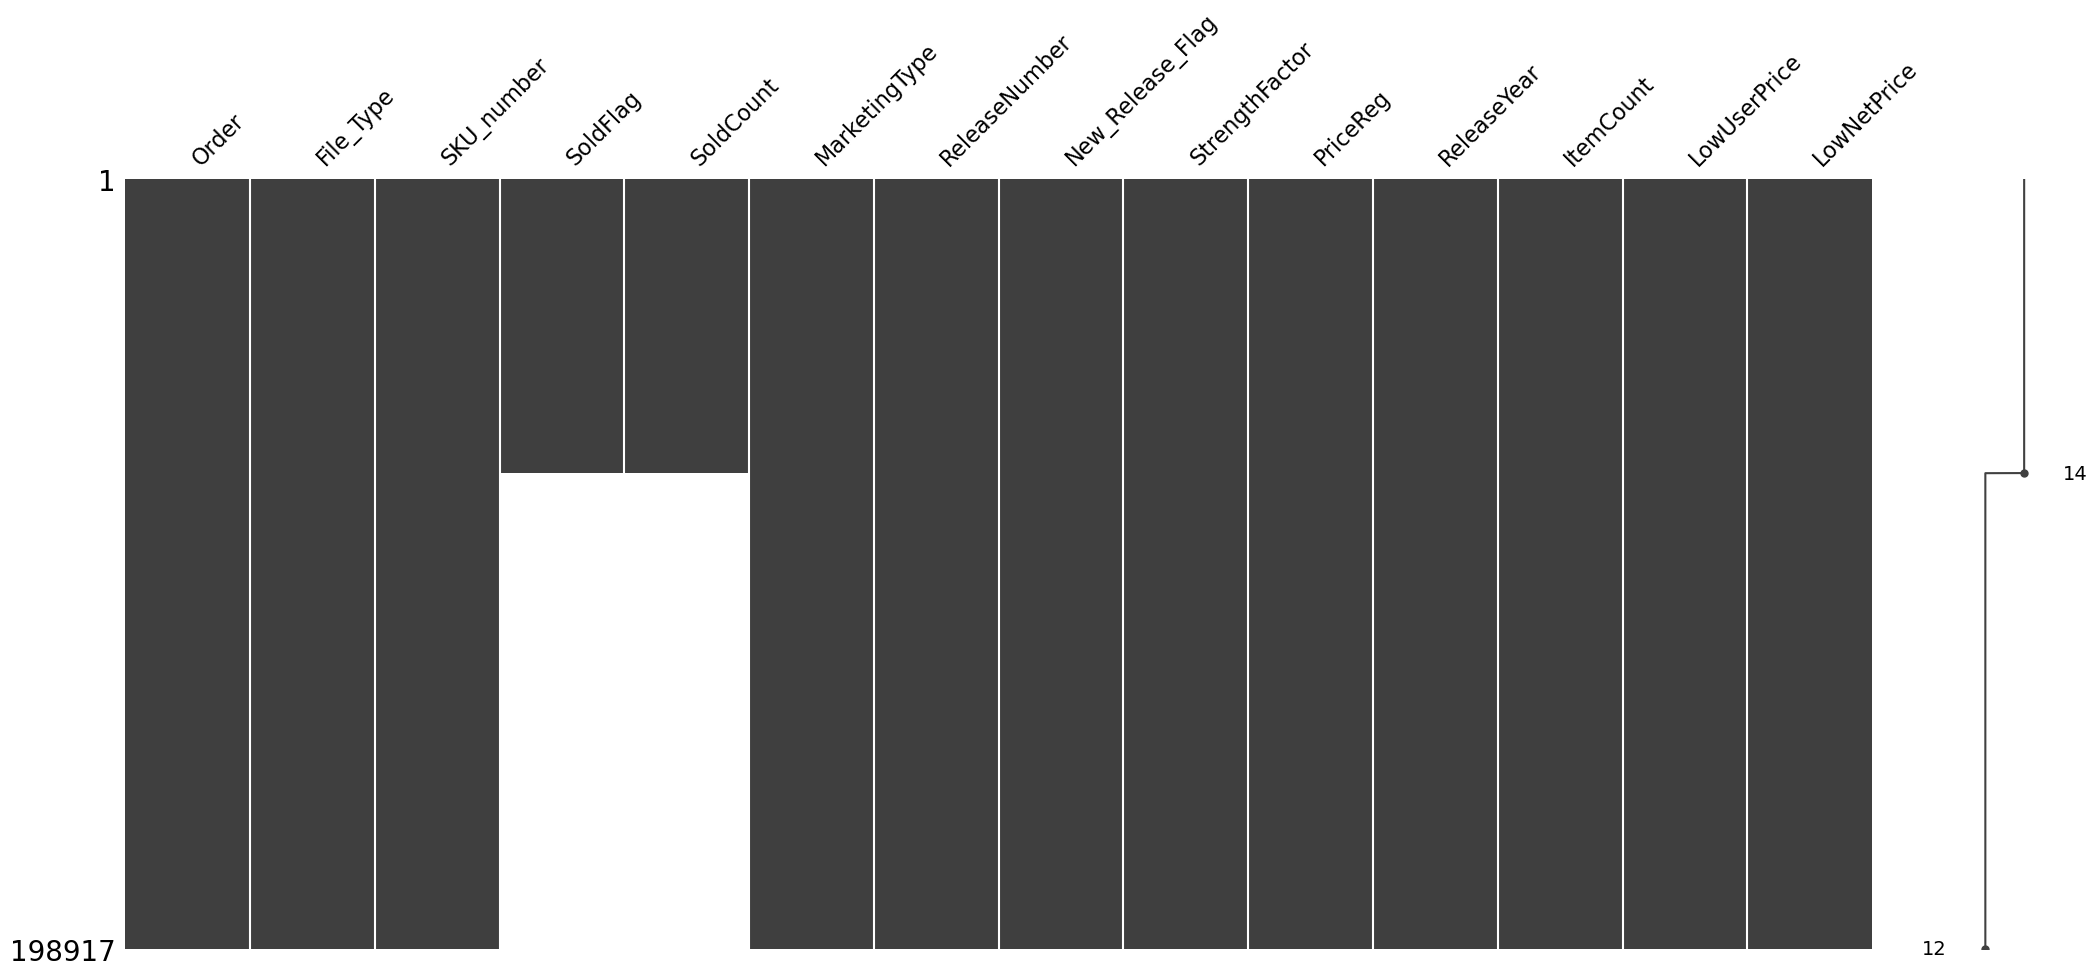

In [5]:
# here we better visualise the missing values
# we can use the values we have as training data
# to identify the rest
missingno.matrix(df)

In [7]:
# here we can see diff columns and types of data in the dataset
df.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


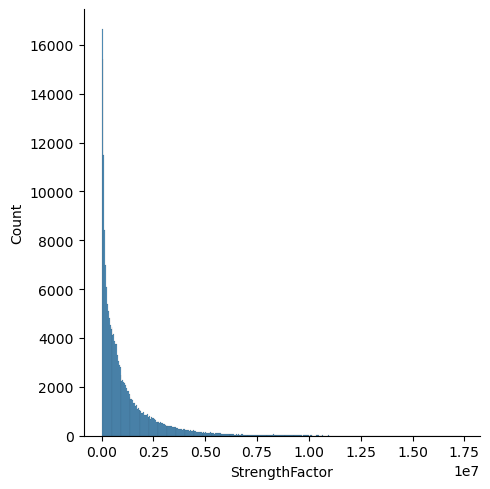

In [8]:
# lets peform simple univariate analysis for
# columns to evaluate the range and count
# of where the values lie 

# this upcoming cells shows us that we
# will rewuire more normally distributed
# data and therefore standard scaling 
# will be implemented

sea.displot(df.StrengthFactor)

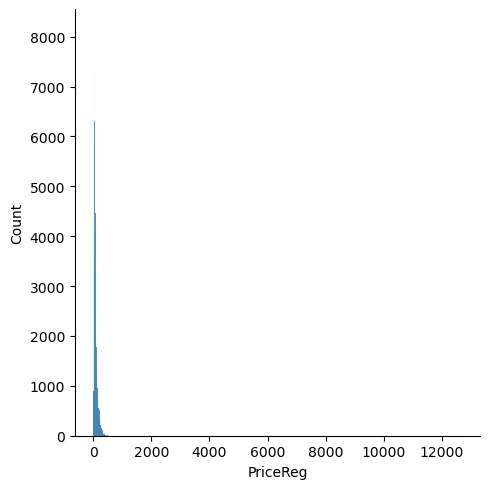

In [9]:
sea.displot(df.PriceReg)

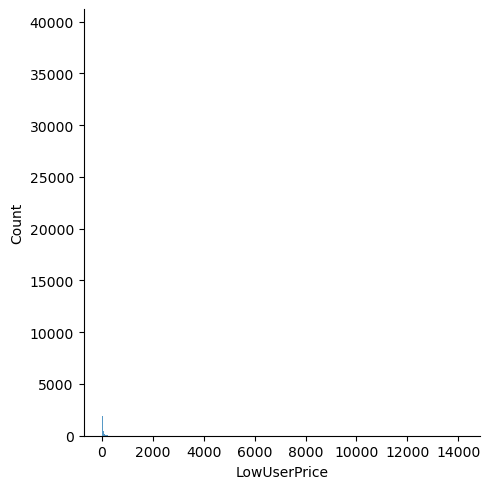

In [10]:
sea.displot(df.LowUserPrice)

S    100946
D     97971
Name: MarketingType, dtype: int64

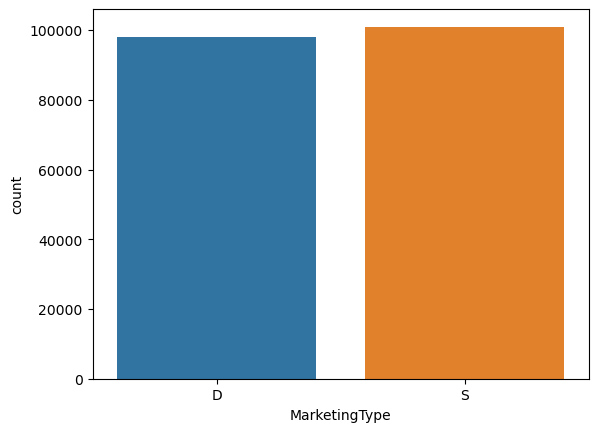

In [11]:
# lets perform categorical analysis to evaluate
# how the data is split (how the product is marketed)

sea.countplot(data = df, x = df.MarketingType)

df.MarketingType.value_counts()

0.0    63000
1.0    12996
Name: SoldFlag, dtype: int64

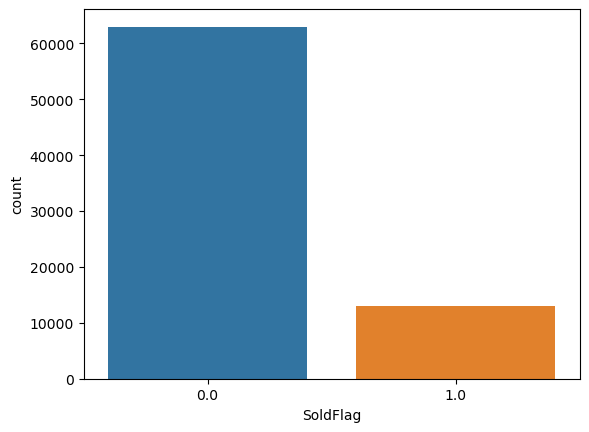

In [12]:
# most inventory products are not being sold
sea.countplot(data = df, x = df.SoldFlag)

df.SoldFlag.value_counts()

In [13]:
df.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


# Standard Scalar

In [14]:
# as showed above, the data is not normally distributed.
# therefore we will perform StandardScaler()

# call
sc = StandardScaler()

# drop these irrelevent values
df = df.drop(["SKU_number",
              "Order",
              "SoldCount",
              "ReleaseYear"],axis=1)

# transform teh data
scdata = pd.DataFrame(sc.fit_transform(df.drop(["File_Type",
                                              "SoldFlag",
                                              "MarketingType",
                                              "New_Release_Flag"],axis=1)),
                                              columns = df.drop(["File_Type",
                                                                 "SoldFlag",
                                                                 "MarketingType",
                                                                 "New_Release_Flag"],
                                                                 axis=1).columns)

# now rename this transformed data to our dotaframe
# that we will use 'df'
scdata[["File_Type",
        "SoldFlag",
        "MarketingType",
        "New_Release_Flag"]] = df[["File_Type",
                                   "SoldFlag",
                                   "MarketingType",
                                   "New_Release_Flag"]]

# shows the successfully transofrmed data
# we can also see that there remains untransformed
# textual data that can be given numerical alternatives
scdata.head()

,ReleaseNumber,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,File_Type,SoldFlag,MarketingType,New_Release_Flag
0,2.998732,-0.285379,-0.529252,-0.890391,-0.029139,-0.116658,Historical,0.0,D,1
1,0.928463,-0.066423,-0.761911,-0.064630,-0.448593,-0.243493,Historical,0.0,D,1
2,-0.883022,-0.510254,-0.517607,-0.197817,-0.011474,-0.146772,Historical,0.0,D,0
3,0.152112,-0.514494,0.104971,-0.570742,1.490568,0.282602,Historical,1.0,D,1
4,-0.365455,0.112229,0.358037,-0.357642,-0.390677,-0.177741,Historical,1.0,D,1


In [15]:
# we will now use the dummies to replace the textual data
# into numerical data as 1 and 0
df = pd.get_dummies(scdata)
df.head()

,ReleaseNumber,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,SoldFlag,New_Release_Flag,File_Type_Active,File_Type_Historical,MarketingType_D,MarketingType_S
0,2.998732,-0.285379,-0.529252,-0.890391,-0.029139,-0.116658,0.0,1,0,1,1,0
1,0.928463,-0.066423,-0.761911,-0.064630,-0.448593,-0.243493,0.0,1,0,1,1,0
2,-0.883022,-0.510254,-0.517607,-0.197817,-0.011474,-0.146772,0.0,0,0,1,1,0
3,0.152112,-0.514494,0.104971,-0.570742,1.490568,0.282602,1.0,1,0,1,1,0
4,-0.365455,0.112229,0.358037,-0.357642,-0.390677,-0.177741,1.0,1,0,1,1,0


In [16]:
# now we can see that there are null target values
print('data_shape:',df.shape)

print('null fields:',len(df.isnull().any()))

df.isnull().any()

data_shape: (198917, 12)
jumlah field null: 12


ReleaseNumber           False
StrengthFactor          False
PriceReg                False
ItemCount               False
LowUserPrice            False
LowNetPrice             False
SoldFlag                 True
New_Release_Flag        False
File_Type_Active        False
File_Type_Historical    False
MarketingType_D         False
MarketingType_S         False
dtype: bool

# Multicolinearity Data

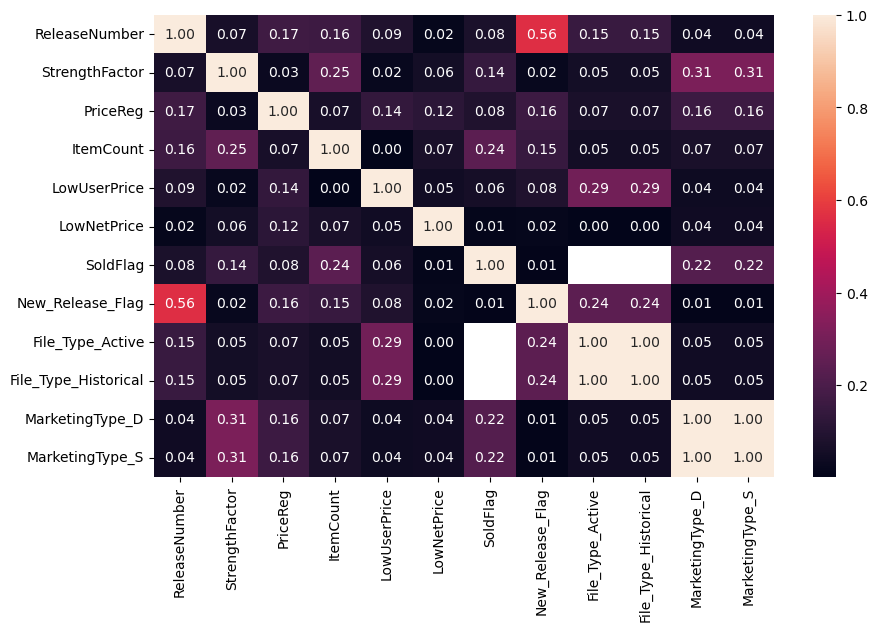

In [17]:
# we use correlation maps to visualise if
# there are features with correlations
# these values can be removed or combined
correlation = df.corr()

abs_correlation = abs(correlation)

plt.figure(figsize=(10,6))

ax = sea.heatmap(abs_correlation,annot=True,fmt=".2f")

plt.show()

# Train & Test Split

In [18]:
# we will perform a a 30% test and train split
# the random state will remain a random number for the
# purpose of testing

train = df[df.SoldFlag.notnull()]
xtrain_=train.drop(["SoldFlag"],axis=1)
ytrain_=train.SoldFlag

x = xtrain_
y = ytrain_

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)
x_train.head()

,ReleaseNumber,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,New_Release_Flag,File_Type_Active,File_Type_Historical,MarketingType_D,MarketingType_S
22530,1.704814,-0.219424,-0.010898,-0.304367,0.286936,0.234357,1,0,1,1,0
63902,-0.365455,-0.476745,0.047325,-0.703929,-0.448593,-0.107709,1,0,1,0,1
33237,0.152112,0.011445,0.174146,0.068557,0.637326,-0.008264,1,0,1,1,0
19334,-0.365455,0.683313,-0.356198,-0.730566,-0.448593,0.090870,1,0,1,1,0
73705,-0.106671,-0.647342,-0.529252,0.308294,-0.002787,-0.076584,1,0,1,0,1


# Logistic Regression (from scratch)

In [19]:
# The sigmoid function is a mathematical function used to map the predicted values to probabilities.
# It maps any real value into another value within a range of 0 and 1. 
# The value of the logistic regression must be between 0 and 1, 
# which cannot go beyond this limit, so it forms a curve like the “S” form.
# The S-form curve is called the Sigmoid function or the logistic function.
# In logistic regression, we use the concept of the threshold value, 
# which defines the probability of either 0 or 1. 
# Such values above the threshold value tends to 1, 
# and values below the threshold values tends to 0.
def sigmoid(x):
    return 1/(1+np.exp(-x))

# We create the class for our logistic regression
class LogisticRegressionFromScratch():
    
    # First we will initialize the attributes of an object as 
    # soon as the object is formed through def __init__(self)

    # SELF represents the instance of class, allows us to access variables/attributes, etc.
    def __init__(self, lr=0.001, n_iters=1000):
        
        # 'lr' represents the learning rate, controls how much the coefficients 
        # (and therefore the model) changes or learns each time it is updated.
        # Learning rate is a hyperparameter that controls the step size at 
        # which the optimization algorithm adjusts the model's parameters during training.
        self.lr = lr

         # 'n_iters'  refers to the number of iterations or epochs in the context of 
        # logistic regression and other machine learning algorithms. 
        # It represents the number of times the optimization algorithm (such as gradient descent) 
        # goes through the entire training dataset to update the model's parameters.
        self.n_iters = n_iters

        # Weights represent the strength of the relationship between each input variable.
        # A weight decides how much influence the input will have on the output.
        self.weights = None

        # the bias term (often referred to as the intercept) is a crucial component of the model. 
        # It represents the log-odds of the probability that the dependent variable 
        # takes on the value of 1 when all independent variables are set to zero.
        self.bias = None

    # now we create a fit function for fitting data
    def fit(self, X, y):

        # n_samples refers to the number of samples or data points in your dataset. 
        # It is a fundamental parameter that describes the size of your dataset.

        # n_features refers to the number of feature variables or predictors that are 
        # used to make predictions. These feature variables are the characteristics 
        # or attributes of the data that the logistic regression model uses to estimate 
        # the probability of a binary outcome. "n_features" is a fundamental 
        # parameter that describes the dimensionality of the feature space.
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # The gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_pred = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            predictions = sigmoid(linear_pred)

            # compute gradients
            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            # update parameters
            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db

    # creating the predict function
    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred
    
#----------------------------------------------------------
# we now test the model to see if it works as intended
clf = LogisticRegressionFromScratch(lr=0.01)
clf.fit(x_train,y_train) # fit the data
y_pred = clf.predict(x_test) # predict the test set

# quick formula for testing accuracy of the model
def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

# print the accuracy after calling the accuracy function
acc = accuracy(y_pred, y_test)
print('Accuracy: ',acc)

Accuracy:  0.829203035220843


# Metric Evaluation (From Scratch VS SKLEARN)

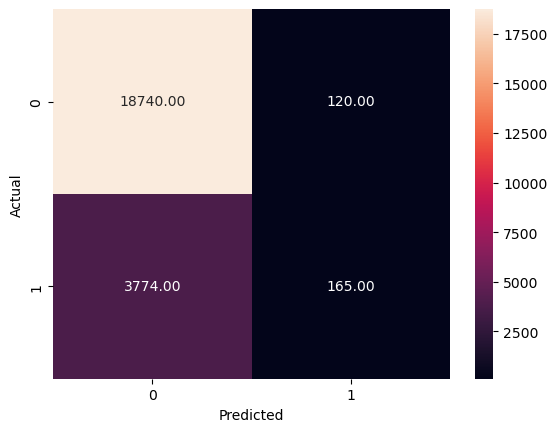

_________________Logistic Regression FROM SCRATCH_________________
              precision    recall  f1-score   support

         0.0       0.83      0.99      0.91     18860
         1.0       0.58      0.04      0.08      3939

    accuracy                           0.83     22799
   macro avg       0.71      0.52      0.49     22799
weighted avg       0.79      0.83      0.76     22799

Accuracy: 82.92 %


In [20]:
# Lets visualise the Logistic Regression Model performance we created from scratch
# to the performance of the regular Logistic classification Model from SKLearn

# first lets visualise the LR from Scratch using a confusion matrix
sea.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# We will also evaluate the performance of the model we created from scratch
print("_________________Logistic Regression FROM SCRATCH_________________")
print (classification_report(y_test, y_pred))
print ("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred) * 100))

_________________Logistic Regression SKLEARN_________________
              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91     18860
         1.0       0.61      0.08      0.15      3939

    accuracy                           0.83     22799
   macro avg       0.72      0.54      0.53     22799
weighted avg       0.80      0.83      0.78     22799

Accuracy: 83.23 %


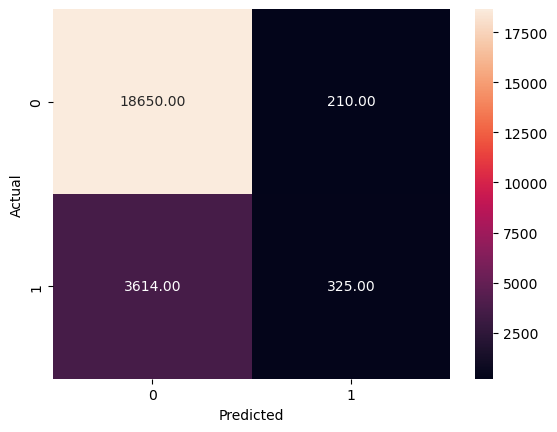

In [21]:
# Now lets get the performance of the logistic regression model
# from SKLearn for comparision.
LogReg = LogisticRegression()

# fitting the data
y_pred_logreg = LogReg.fit(x_train,y_train).predict(x_test)

# Here we print the metrics / classification report 
print("_________________Logistic Regression SKLEARN_________________")
print (classification_report(y_test, y_pred_logreg))
print ("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred_logreg) * 100))

# Confusion matrix for SKlearn LR
sea.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Discussion:

**Improving the model reccomendations:**

- Removing outliers. This will avoid skewing data.
- Removing multicolinearity. Logistic regression assumes that the features are not correlated with one another. Therefore check the pairwise correlation and remove those variables which are highly correlated.
- Normal distribution. Ensure the data is normally disctributed through StandardScaler() or related methods, whioch has been done.
- Ensure the output or target variables are binary, such as 1 and 0, which it is.
- Regularization. Takes a complex model and sets their weights to zero (L1 regularization). This effectively removes a predictor from the linear equation or lowers its weights towards zero (L2 regularization), making the feature less impactful on the final logistic regression equation.

**Optimizing hyperperameters:**

To get the best set of hyperparameters we can use Grid Search. Grid Search passes all combinations of hyperparameters to the model to check the result. It then returns the hyperparemeters which gave the best results. This process involves StandardScaler(), PCA, then GridSearchCV.